## Variant Test

In [1]:
import pandas as pd

df = pd.read_csv('data/canada_variant_weekly_4w_avg.csv', index_col=0)
df

,Omicron,Delta,Alpha,Beta,Gamma,Epsilon,Zeta,Eta,Theta,Iota,Kappa,Lambda,total
2019-12-29,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
2020-01-05,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
2020-01-12,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
2020-01-19,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
2020-01-26,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-18,2729.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2729.25
2022-09-25,2387.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2387.75
2022-10-02,1801.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1801.00
2022-10-09,1145.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1145.25


<AxesSubplot:>

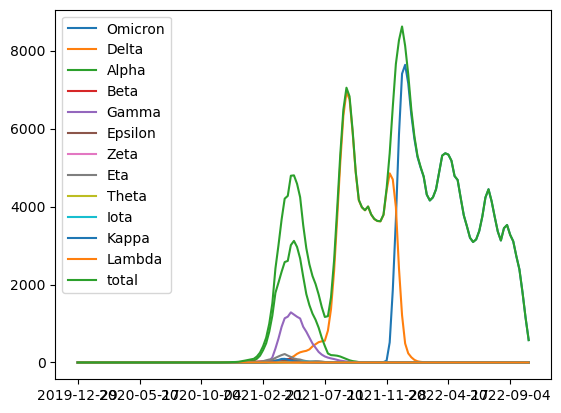

In [2]:
df.plot()

<AxesSubplot:>

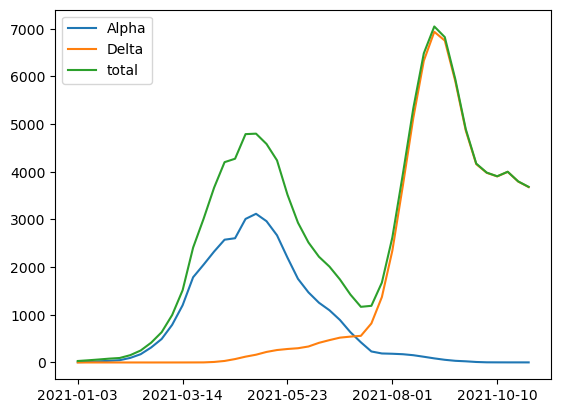

In [3]:
df.loc['2021-01-01': '2021-11-01', ['Alpha', 'Delta', 'total']].plot()

<AxesSubplot:>

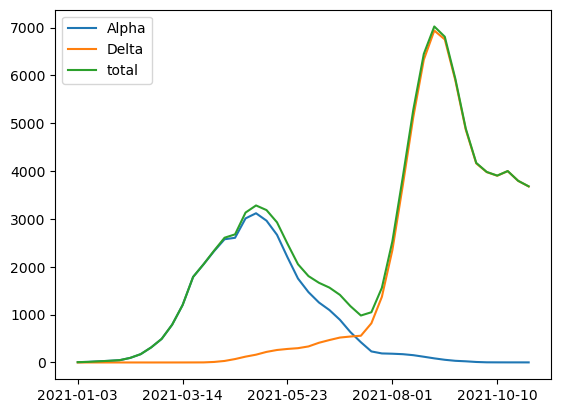

In [4]:
xdf = df.loc['2021-01-01': '2021-11-01', ['Alpha', 'Delta']]
xdf['total'] = xdf.sum(axis=1)
xdf.plot()

In [24]:
M = xdf['total'].to_numpy().reshape(-1, 1)
r = 2

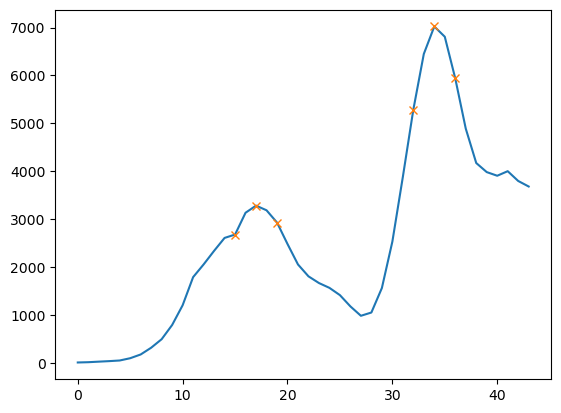

In [25]:
from peaks import get_neighbors
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

m, n = M.shape
peaks, _ = find_peaks(x=M.reshape(m, ), prominence=1, width=3)
pvals = get_neighbors(peaks, m, nrad=2)

plt.plot(M)
plt.plot(pvals, M[pvals], 'x')

In [30]:
import numpy as np
from algo import numf

W0 = np.random.rand(m, r)
H0 = np.random.rand(r, n)

W, H, plocs = numf(M, W0, H0, iters=2000)

0.18818475294380924
0.15811327324329402
0.14726805581518432
0.14001706951352325
0.13477575494411015
0.13072733405466974
0.12740526420643755
0.12446590384675796
0.12176186007299618
0.11925783542734232
0.11692613978883552
0.11474368030572046
0.1126925836204598
0.11076025945614444
0.10893596891289398
0.10721016652841286
0.10557429334688483
0.10404894328178053
0.10261055551345713
0.10123791148311852
0.09992544608963562
0.09866803814981501
0.09746107057967983
0.09630043976815726
0.09518248339782596
0.09410392503562047
0.09306179025434151
0.09205328589445708
0.09107590207553319
0.09012739738242702
0.08920576715340466
0.08830921557410013
0.08743613082528875
0.08658505953104814
0.0857546877060954
0.08494382877239275
0.08415140870904117
0.08337645296121654
0.08261807497255094
0.08187546613783578
0.08114788699901858
0.0804346595289161
0.0797351603659653
0.07904881488009122
0.07837509196461839
0.07771349946227325
0.07707089210186038
0.07644028251191823
0.07582029411922495
0.07521053529084996
0.07

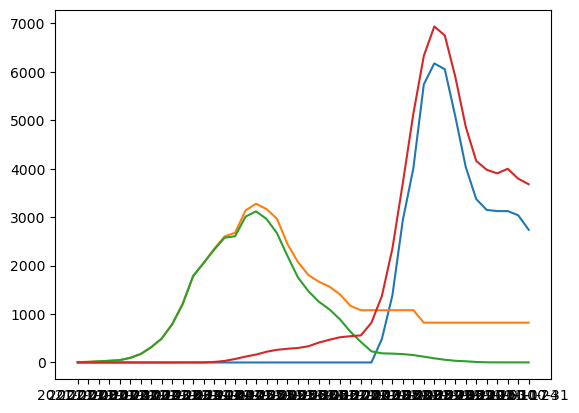

In [31]:
for i in range(r):
    plt.plot(W[:, i] * H[i, :])
plt.plot(xdf['Alpha'])
plt.plot(xdf['Delta'])

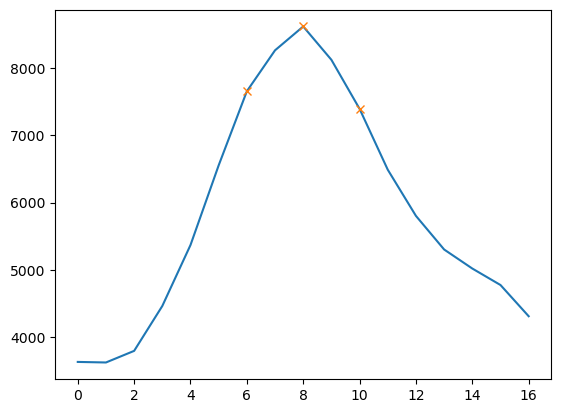

In [28]:
import matplotlib.pyplot as plt

plt.plot(M)
plt.plot(pvals, M[pvals], 'x')

## Regional Test

In [107]:
df2 = pd.read_csv('data/canada_regional_14d_avg.csv', index_col=0)
df2

,Alberta,British Columbia,Manitoba,New Brunswick,Newfoundland and Labrador,Northwest Territories,Nova Scotia,Nunavut,Ontario,Prince Edward Island,Quebec,Saskatchewan,Yukon,total
2020-01-22,0.000000,0.142857,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.428571,0.0,0.000000,0.0,0.000000,0.571429
2020-01-23,0.000000,0.071429,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.428571,0.0,0.000000,0.0,0.000000,0.500000
2020-01-24,0.000000,0.071429,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.428571,0.0,0.000000,0.0,0.000000,0.500000
2020-01-25,0.000000,0.071429,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.428571,0.0,0.000000,0.0,0.000000,0.500000
2020-01-26,0.000000,0.071429,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.428571,0.0,0.000000,0.0,0.000000,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-03,109.428571,145.142857,64.000000,125.000000,41.928571,0.0,229.357143,0.0,1777.357143,45.5,923.285714,0.0,2.642857,3463.642857
2022-10-04,109.428571,145.142857,64.000000,125.000000,41.928571,0.0,229.357143,0.0,1777.357143,45.5,956.571429,0.0,2.214286,3496.500000
2022-10-05,109.428571,145.142857,64.000000,125.000000,41.928571,0.0,229.357143,0.0,1812.285714,91.0,958.714286,0.0,2.214286,3579.071429
2022-10-06,0.000000,145.142857,64.000000,164.857143,53.571429,0.0,298.142857,0.0,1812.285714,91.0,928.857143,0.0,2.785714,3560.642857


In [108]:
df2.sum() > 100000

Alberta                       True
British Columbia              True
Manitoba                      True
New Brunswick                False
Newfoundland and Labrador    False
Northwest Territories        False
Nova Scotia                   True
Nunavut                      False
Ontario                       True
Prince Edward Island         False
Quebec                        True
Saskatchewan                  True
Yukon                        False
total                         True
dtype: bool

<AxesSubplot:>

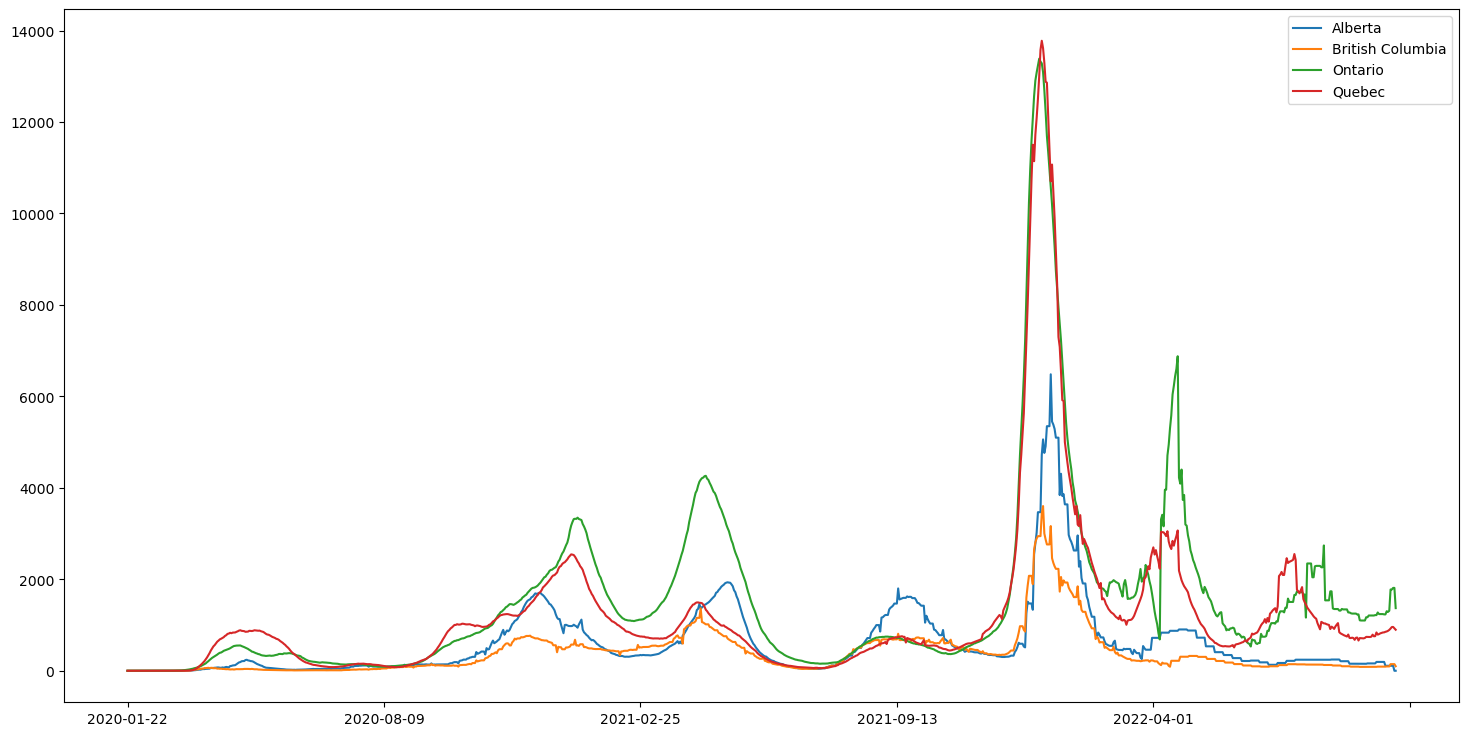

In [118]:
df2.loc[:, df2.sum() > 200000].drop('total', axis=1).plot(figsize=(18, 9))

<AxesSubplot:>

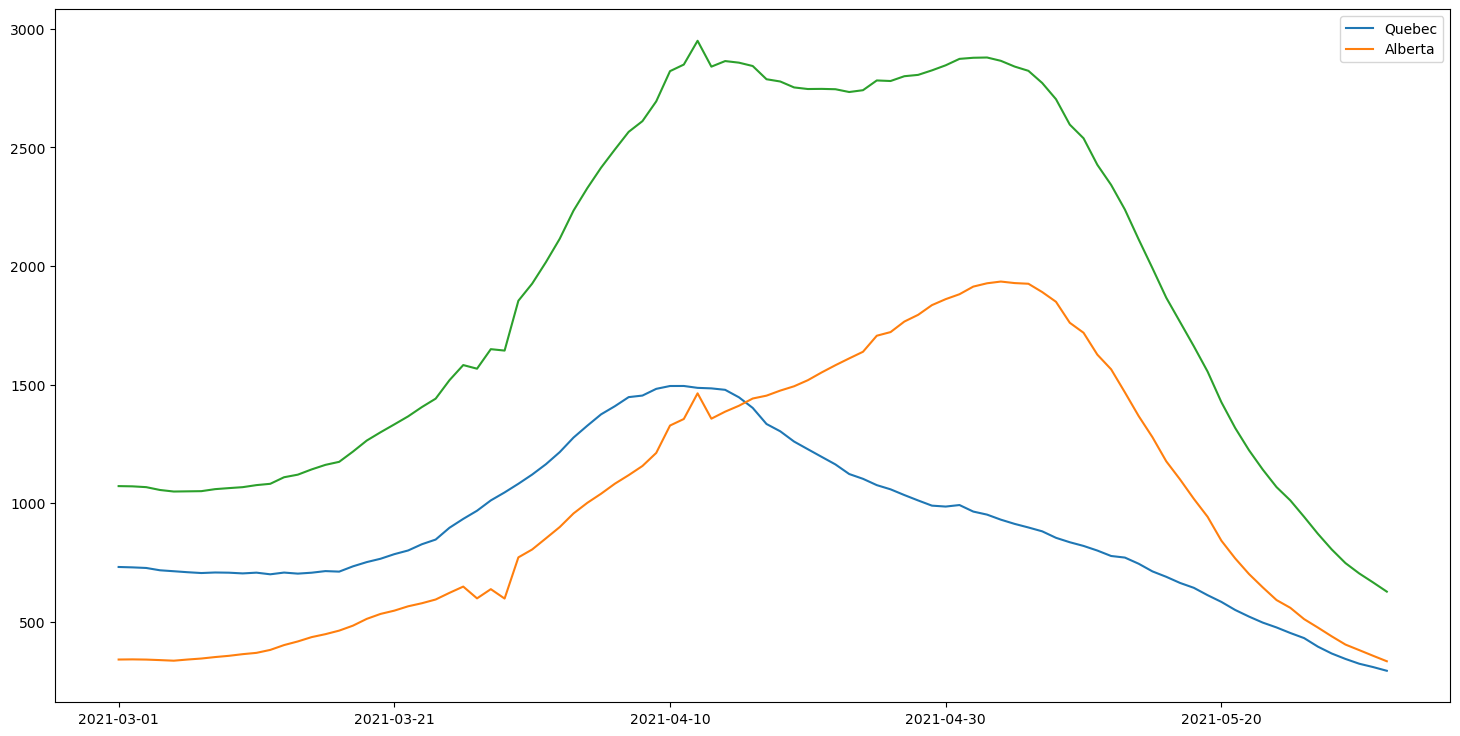

In [121]:
df2.loc['2021-03-01': '2021-06-01', ['Quebec', 'Alberta']].plot(figsize=(18, 9))
df2.loc['2021-03-01': '2021-06-01', ['Quebec', 'Alberta']].sum(axis=1).plot(figsize=(18, 9))

In [122]:
ydf = df2.loc['2021-03-01': '2021-06-01', ['Quebec', 'Alberta']].copy()

<AxesSubplot:>

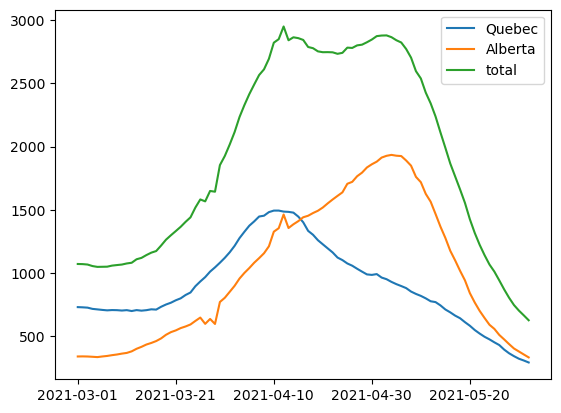

In [123]:
ydf['total'] = ydf.sum(axis=1)
ydf.plot()

In [124]:
M = ydf['total'].to_numpy().reshape(-1, 1)
r = 2

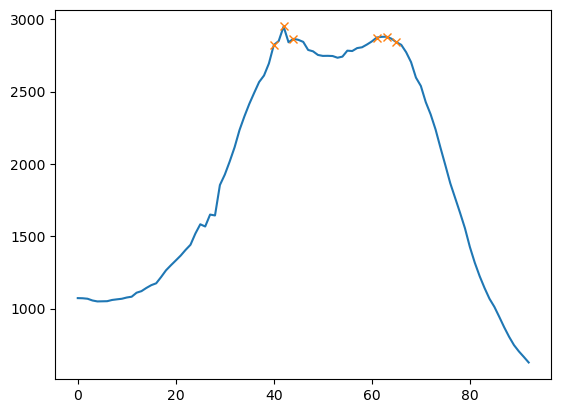

In [125]:
m, n = M.shape
peaks, _ = find_peaks(x=M.reshape(m, ), prominence=1, width=3)
pvals = get_neighbors(peaks, m, nrad=2)

plt.plot(M)
plt.plot(pvals, M[pvals], 'x')

In [161]:
W0 = np.random.rand(m, r)
H0 = np.random.rand(r, n)

W, H, plocs = numf(M, W0, H0, pvals=pvals, l2=0.3, iters=200)

0.28529398796245575
0.22033133681049638
0.19886348457549272
0.1876312246618479
0.17812671072016087
0.16944358675347854
0.1632531158784028
0.14731726921318777
0.13721766798759663
0.12444729618959789
0.11522861484789054
0.1095420832718597
0.10376234877886807
0.09888548696438743
0.09458099829847179
0.09068239711961779
0.08749814685310109
0.08407548401699058
0.0808846680040137
0.07788767216128327
0.07506345150380017
0.07242518453475492
0.06992821564678722
0.06755661931490377
0.06530240313932247
0.0631594622828043
0.06112905714581575
0.05921386465667978
0.05739399905481865
0.05566764432604575
0.05402826691232112
0.0524696277567827
0.05098653730311905
0.049575121482879216
0.048232181915734425
0.046954157408206736
0.04573745117657117
0.04457875326391057
0.04347547554256082
0.042424525726935634


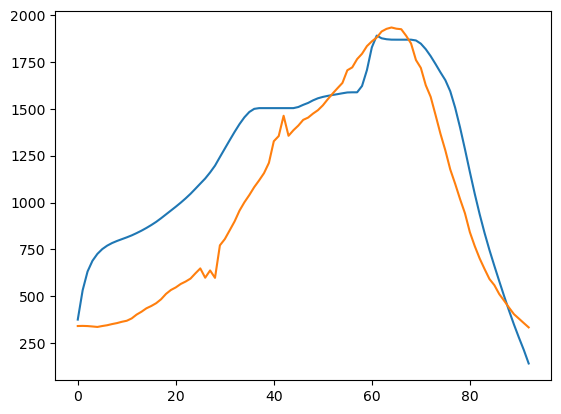

In [168]:
# for i in range(r):
#     plt.plot(W[:, i] * H[i, :])
#     break
plt.plot(W[:, 1] * H[1, :])
plt.plot(ydf['Alberta'].to_numpy())
# plt.plot(ydf['Quebec'])
# plt.plot(ydf['total'])

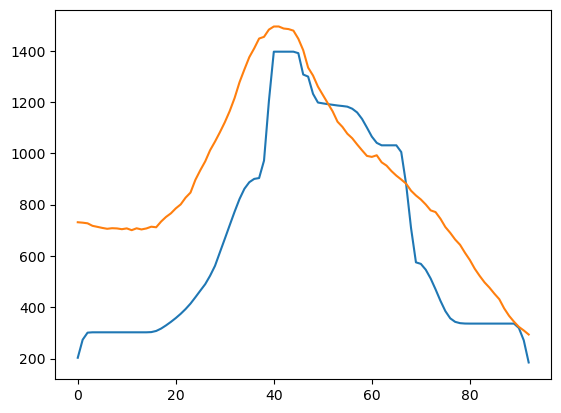

In [169]:
plt.plot(W[:, 0] * H[0, :])
plt.plot(ydf['Quebec'].to_numpy())

In [ ]:
import /src